<a href="https://colab.research.google.com/github/luisedu96/TransmisionGuiada/blob/master/Actividades/Par%C3%A1metros_Constitutivos_lineas_transmision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from IPython.display import Image
from IPython.core.display import HTML 

uo = 1.25566e-6
eo = 8.8542e-12
c = 3e8
ur_dielectrico = 1
j = np.complex(0,1)

In [2]:
Linea_de_transmision = "Doble cinta" #@param ["Coaxial", "Bifilar", "Doble cinta"]
a_milimetros =   1.08#@param {type: "number"}
b_milimetros =   5.35#@param {type: "number"}
Tangente_perdidas_dielectrico =   0.0002#@param {type: "number"}
er_dielectrico =   2.25#@param {type: "number"}
ur_conductor =   1#@param {type: "number"}
Conductividad_conductor_1e7 =   5.8#@param {type: "number"}
Frecuencia_min_Mhz =   1#@param {type: "number"}
Frecuencia_max_Mhz =   300#@param {type: "number"}
Step = 100#@param {type: "number"}

In [3]:
a = a_milimetros*(1/1e3)
b = b_milimetros*(1/1e3)
fmin = Frecuencia_min_Mhz*1e6 
fmax = Frecuencia_max_Mhz*1e6
f = np.arange(fmin, fmax, 100)
e_dielectrico = er_dielectrico*eo
u_dielectrico = ur_dielectrico*uo
u_conductor = ur_conductor*uo
omega = 2*np.pi*f#
conduc_die = np.abs(Tangente_perdidas_dielectrico)*(omega*e_dielectrico) #
Rs = np.sqrt((np.pi*f*u_conductor)/(Conductividad_conductor_1e7*1e7)) #
eta = (120*np.pi)/(np.sqrt(er_dielectrico))

In [4]:
print(omega)

[6.28318531e+06 6.28381363e+06 6.28444194e+06 ... 1.88495371e+09
 1.88495434e+09 1.88495496e+09]


In [5]:
def graficas(frec, induc, cap, resis, admi, tipo):
  fig, ax = plt.subplots(2, 2, figsize=(15, 10))
  ax[0][0].plot([np.min(frec),np.max(frec)], [induc,induc], label='Inductancia [H/m]', color = 'green')
  ax[0][0].set_xlabel('Frecuencia [hz]', fontsize=14)
  ax[0][0].set_ylabel('Inductancia [H/m]', fontsize=14)
  ax[0][0].set_title('Inductancia del '+tipo, fontsize=18)
  ax[0][0].legend()

  ax[0][1].plot([np.min(frec),np.max(frec)], [cap,cap], label='Capacitancia [F/m]', color = 'orange')
  ax[0][1].set_xlabel('Frecuencia [hz]', fontsize=14)
  ax[0][1].set_ylabel('Capacitancia [F/m]', fontsize=14)
  ax[0][1].set_title('Capacitancia del '+tipo, fontsize=18)
  ax[0][1].legend()

  ax[1][0].plot(frec, resis, label='Resistencia [W/m]', color = 'blue')
  ax[1][0].set_xlabel('Frecuencia [hz]', fontsize=14)
  ax[1][0].set_ylabel('Resistencia [W/m]', fontsize=14)
  ax[1][0].set_title('Resistencia del '+tipo, fontsize=18)
  ax[1][0].legend()

  ax[1][1].plot(frec, admi, label='Admitancia [W/m]', color = 'red')
  ax[1][1].set_xlabel('Frecuencia [hz]', fontsize=14)
  ax[1][1].set_ylabel('Admitancia [W/m]', fontsize=14)
  ax[1][1].set_title('Admitancia del '+tipo, fontsize=18)
  ax[1][1].legend()

  fig.show()

In [6]:
def graficaszoalpha(frec, impedancia, atenuacion, tipo):
  fig, ax = plt.subplots(2, 2, figsize=(15, 10))
  ax[0][0].plot(frec, np.abs(impedancia), label='Impedancia [W]', color = 'blue')
  ax[0][0].set_xlabel('Frecuencia [hz]', fontsize=14)
  ax[0][0].set_ylabel('Magnitud [W]', fontsize=14)
  ax[0][0].set_title('Impedancia caracteritica del '+tipo, fontsize=18)
  ax[0][0].legend()

  ax[0][1].plot(frec, np.angle(impedancia), label='Fase de la impedancia [rad]', color = 'red')
  ax[0][1].set_xlabel('Frecuencia [hz]', fontsize=14)
  ax[0][1].set_ylabel('Fase [rad]', fontsize=14)
  ax[0][1].set_title('Impedancia caracteritica del '+tipo, fontsize=18)
  ax[0][1].legend()

  ax[1][0].plot(frec, np.abs(atenuacion), label='Atenuación', color = 'blue')
  ax[1][0].set_xlabel('Frecuencia [hz]', fontsize=14)
  ax[1][0].set_ylabel('Magnitud', fontsize=14)
  ax[1][0].set_title('Atenuación del '+tipo, fontsize=18)
  ax[1][0].legend()

  ax[1][1].plot(frec, np.angle(atenuacion), label='Fase de la atenuación [rad]', color = 'red')
  ax[1][1].set_xlabel('Frecuencia [hz]', fontsize=14)
  ax[1][1].set_ylabel('Fase [rad]', fontsize=14)
  ax[1][1].set_title('Atenuación del '+tipo, fontsize=18)
  ax[1][1].legend()

  fig.show()

In [7]:
if (Linea_de_transmision == "Coaxial"):
  C = (2*np.pi*e_dielectrico)/(np.log(b/a))
  L = (u_dielectrico/(2*np.pi))*np.log(b/a)
  G = (2*np.pi*conduc_die)/(np.log(b/a)) #
  R = (Rs/(2*np.pi))*((1/b)+(1/a)) #
  Zo = np.sqrt((R+j*omega*L)/(G + j*omega*C))
  gama = np.sqrt((R+j*omega*L)*(G+j*omega*C))
  alpha = np.real(gama)

if (Linea_de_transmision == "Bifilar"):
  d = b
  C = (np.pi*e_dielectrico)/(np.log(d/a))
  L = (u_dielectrico/(np.pi))*np.log(d/a)
  G = (2*np.pi*conduc_die)/(np.log(d/a))#
  R = Rs/(np.pi*a) #
  Zo = np.sqrt((R+j*omega*L)/(G + j*omega*C))
  gama = np.sqrt((R+j*omega*L)*(G+j*omega*C))
  alpha = np.real(gama)

if (Linea_de_transmision == "Doble cinta"):
  C = e_dielectrico*(b/a)
  L = u_dielectrico*(a/b)
  G = conduc_die*(b/a) #
  R = (2*Rs)/b #
  Zo = np.sqrt((R+j*omega*L)/(G+j*omega*C))
  gama = np.sqrt((R+j*omega*L)*(G+j*omega*C))
  alpha = np.real(gama)
  

In [8]:
print(conduc_die)

[2.50346607e-08 2.50371642e-08 2.50396676e-08 ... 7.51039070e-06
 7.51039320e-06 7.51039571e-06]


Capacitancia  9.868743749999998e-11
Inductancia 2.534790280373832e-07


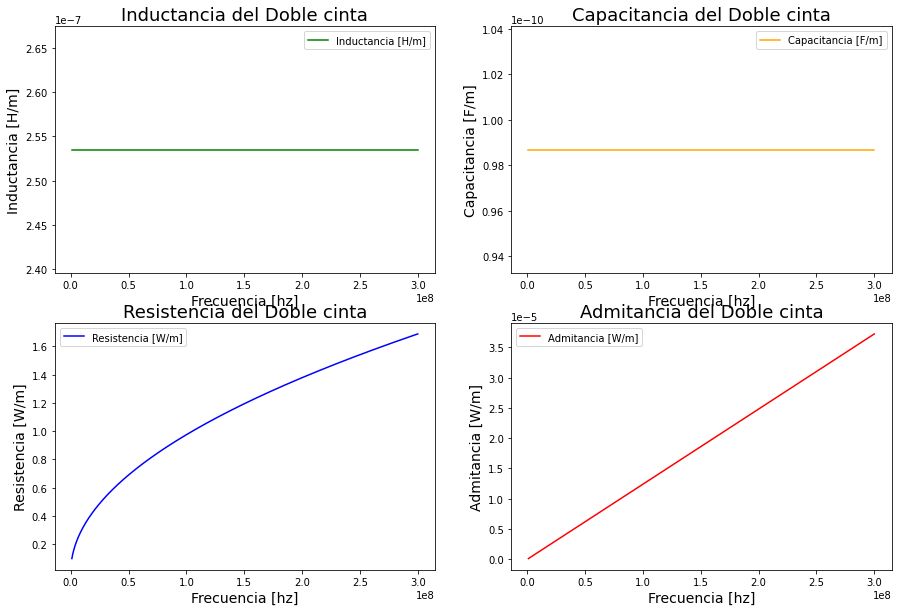

In [14]:
graficas(f, L, C, R, G, Linea_de_transmision)
print("Capacitancia ",C)
print("Inductancia",L)

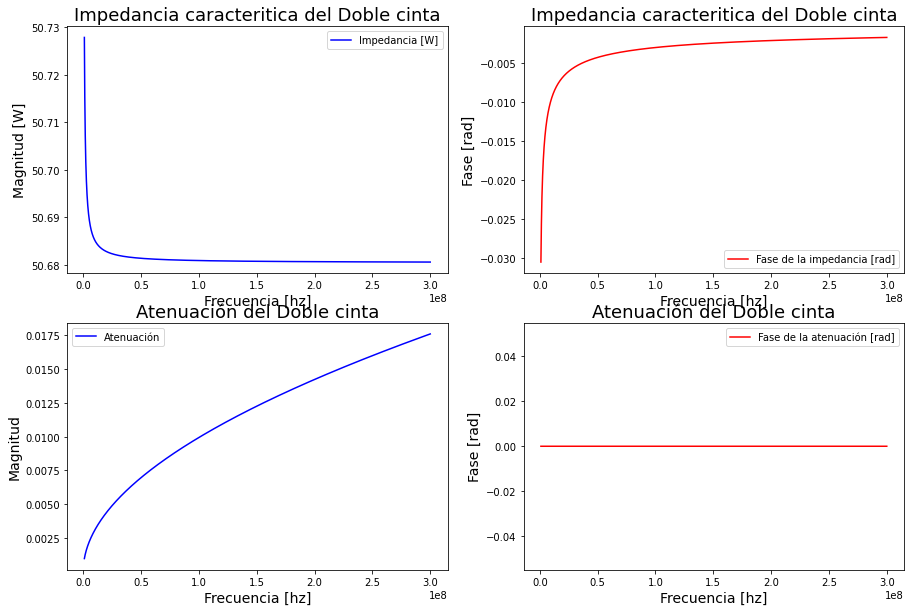

In [10]:
graficaszoalpha(f,Zo,alpha,Linea_de_transmision)

In [11]:
print(alpha)

[0.00096453 0.00096458 0.00096463 ... 0.0176023  0.0176023  0.0176023 ]
